## Introduction
<p><img src="https://assets.datacamp.com/production/project_1174/img/trendlines.jpg" alt="Image of two trendlines over time."></p>
<p>It’s important to stay informed about trends in programming languages and technologies. Knowing what languages are growing or shrinking can help you decide where to invest. </p>
<p>An excellent source to gain a better understanding of popular technologies is <a href="https://stackoverflow.com/">Stack Overflow</a>. Stack overflow is an online question-and-answer site for coding topics. By looking at the number of questions about each technology, you can get an idea of how many people are using it.</p>
<p>You'll be working with a dataset with one observation for each tag in each year. The dataset was downloaded from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a>. Below you can find an overview of the data that is available to you:<br><br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/stack_overflow_data.csv</b></div>
<ul>
    <li><b>year:</b> The year the question was asked.</li>
    <li><b>tag:</b> A word or phrase that describes the topic of the question.</li>
    <li><b>number:</b> The number of questions with a certain tag in that year.</li>
    <li><b>year_total:</b> The total number of questions asked in that year.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/41">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around data manipulation and visualization in the Tidyverse and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/introduction-to-the-tidyverse">Introduction to the Tidyverse</a>.</em></p>


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


year,tag,number,year_total
<dbl>,<chr>,<dbl>,<dbl>
2008,treeview,69,168541
2008,scheduled-tasks,30,168541
2008,specifications,21,168541
2008,rendering,35,168541
2008,http-post,6,168541
2008,static-assert,1,168541
2008,asp.net-ajax,159,168541
2008,collision-detection,10,168541
2008,systray,4,168541


year,tag,number,year_total,fraction
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2019,r,52249,5410632,0.9656728


# A tibble: 57,211 x 2
   tag        tag_total
   <chr>          <dbl>
 1 javascript   1373634
 2 python       1187838
 3 java          982747
 4 android       737330
 5 c#            730045
 6 php           723982
 7 html          622827
 8 jquery        459983
 9 css           410852
10 c++           367152
# ... with 57,201 more rows


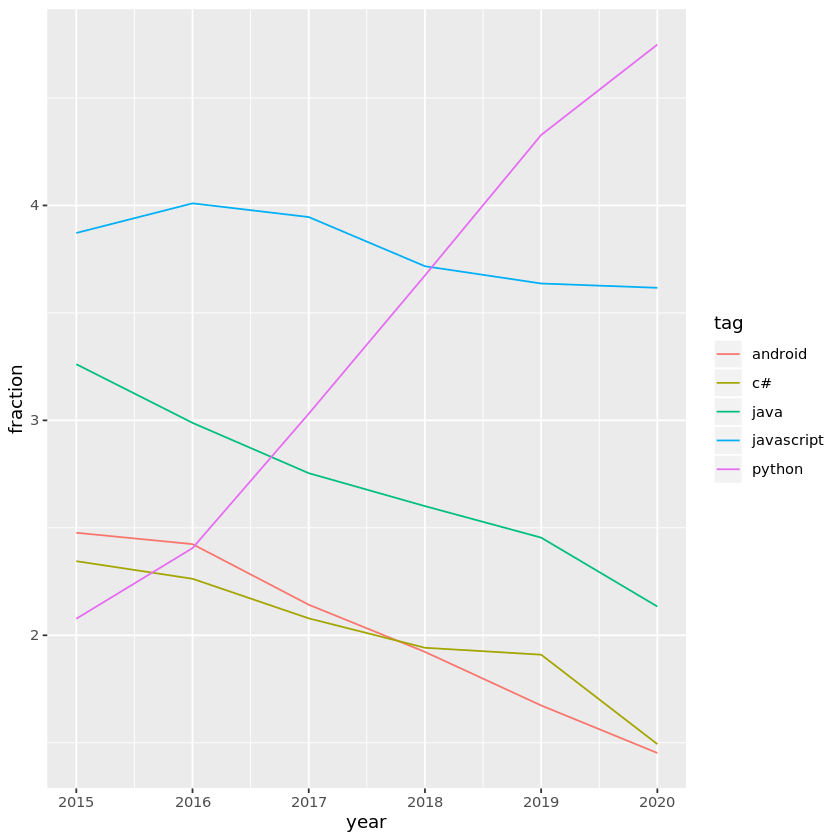

In [2]:
library(readr)
library(dplyr)
library(ggplot2)

by_tag_year <- read_csv("datasets/stack_overflow_data.csv")

by_tag_year


# ------------ QUESTION 1 ------------ # 
# What fraction of the total number of questions asked in 2019 had the R tag? #

by_tag_year_fraction <- by_tag_year %>% 
  mutate(fraction = number/year_total * 100)

R_tag_2019 <- by_tag_year_fraction %>% 
  filter(tag == "r", year == "2019")

R_tag_2019

r_percentage <- R_tag_2019 %>% select(fraction)


# ------------ QUESTION 2 ------------ # 
# What were the five most asked-about tags in the last 5 years (2015-2020)? #

sorted_tags <- by_tag_year %>%
  filter(year >= 2015) %>% 
  group_by(tag) %>% 
  summarize(tag_total = sum(number)) %>% 
  arrange(desc(tag_total))

print(sorted_tags)

highest_tags <- head(sorted_tags$tag, n = 5)


# ---------------QUESTION 3-------------- # 
# Visualize The Findings #

by_tag_subset <- by_tag_year_fraction %>% 
  filter(tag %in% highest_tags, year >= 2015)

ggplot(by_tag_subset, aes(x = year, y = fraction, color = tag)) +
  geom_line()